## Model Trainig

### 1.Import libraries and packages

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import warnings

#### 1.1 Load Dataset

In [60]:
df_or=pd.read_csv('Data/raw.csv')

#### 1.3 Show the tale

In [61]:
df_or.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


#### 1.5 Ploting Default payment next month

C:\Users\sanss\AppData\Local\Temp\ipykernel_14172\1951345879.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=default_data.index,y=default_data.values, saturation=0.95, palette="rocket")


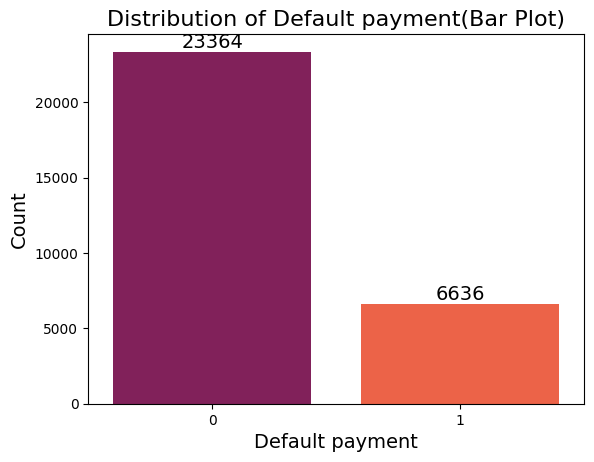

In [62]:
default_data=df_or['default_payment_next_month'].value_counts()
ax=sns.barplot(x=default_data.index,y=default_data.values, saturation=0.95, palette="rocket")
plt.title("Distribution of Default payment(Bar Plot)", fontsize=16)
plt.xlabel("Default payment", fontsize=14)
plt.ylabel("Count", fontsize=14)

for container in ax.containers:
    ax.bar_label(container, color='black', size=14)

plt.show()

Data is imbalanced

### 2. Handling the imbalance of data using SMOTE

In [63]:
# Initialise SMOTE object
smote = SMOTE()
     

# Separate independent and dependent variables
X = df_or.iloc[:,:-1]
y = df_or['default_payment_next_month']
     

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)
     

# Combine balanced X and y
df_bal = pd.DataFrame(x_smote, columns=df_or.columns[:-1])
df_bal['default'] = y_smote

df_bal.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


C:\Users\sanss\AppData\Local\Temp\ipykernel_14172\3989680505.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=default_data.index,y=default_data.values, saturation=0.95, palette="rocket")


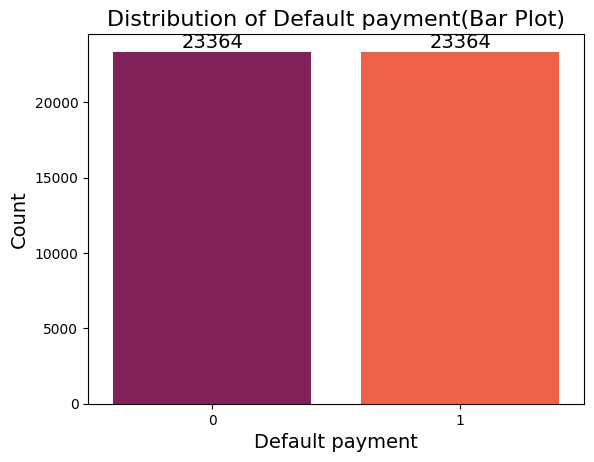

In [64]:
default_data=df_bal['default'].value_counts()
ax=sns.barplot(x=default_data.index,y=default_data.values, saturation=0.95, palette="rocket")
plt.title("Distribution of Default payment(Bar Plot)", fontsize=16)
plt.xlabel("Default payment", fontsize=14)
plt.ylabel("Count", fontsize=14)

for container in ax.containers:
    ax.bar_label(container, color='black', size=14)

plt.show()

In [65]:
df_bal.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [66]:
x_smote

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.000000,2,2,1,24,2,2,-1,-1,...,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000
1,2,120000.000000,2,2,2,26,-1,2,0,0,...,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000
2,3,90000.000000,2,2,2,34,0,0,0,0,...,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000
3,4,50000.000000,2,2,1,37,0,0,0,0,...,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000
4,5,50000.000000,1,2,1,57,-1,0,-1,0,...,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,18997,222572.764955,1,1,1,37,2,2,0,0,...,191234.979139,194884.944846,204253.585801,205598.434506,7885.914743,7666.008290,7279.411119,13070.426284,4529.105982,5271.829486
46724,8760,130000.000000,2,1,1,43,0,0,0,0,...,135491.777575,94893.718015,92781.778384,89876.254641,3098.560793,5555.877910,3546.762242,3362.109788,3306.893350,3644.418033
46725,5297,50000.000000,1,1,1,31,-1,-1,-1,0,...,719.834487,112.570133,1749.294932,172.735646,172.735646,719.834487,0.000000,1809.460446,172.735646,518.206938
46726,27738,106916.083158,2,2,0,42,2,2,2,2,...,40442.991532,41112.714596,41702.968436,42587.160723,1537.412474,2462.587526,1638.321663,1569.160832,1707.482495,1861.678337


### 3. Feature Engineering

In [67]:
df_fr=df_bal.copy()

In [68]:
# Change column names PAY_1 to PAY_6
df_fr.rename(columns={'PAY_0':'PAY_SEPT', 'PAY_2':'PAY_AUG', 'PAY_3':'PAY_JULY', 
                   'PAY_4':'PAY_JUNE', 'PAY_5':'PAY_MAY', 'PAY_6':'PAY_APRIL'}, inplace=True)

# Change column names PAY_AMT_1 to PAY_AMT_6
df_fr.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT', 'PAY_AMT2':'PAY_AMT_AUG', 'PAY_AMT3':'PAY_AMT_JULY', 
                   'PAY_AMT4':'PAY_AMT_JUNE', 'PAY_AMT5':'PAY_AMT_MAY', 'PAY_AMT6':'PAY_AMT_APRIL'}, inplace=True)

# Change column names BILL_AMT_1 to BILL_AMT_6
df_fr.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT', 'BILL_AMT2':'BILL_AMT_AUG', 'BILL_AMT3':'BILL_AMT_JULY', 
                   'BILL_AMT4':'BILL_AMT_JUNE', 'BILL_AMT5':'BILL_AMT_MAY', 'BILL_AMT6':'BILL_AMT_APRIL'}, inplace=True)

df_fr.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUNE,...,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [69]:
df_fr['Payement_Value'] = df_fr['PAY_SEPT'] + df_fr['PAY_AUG'] + df_fr['PAY_JULY'] + df_fr['PAY_JUNE'] + df_fr['PAY_MAY'] + df_fr['PAY_APRIL']

In [70]:
df_fr.groupby('default')['Payement_Value'].mean()

default
0   -1.980140
1    1.645908
Name: Payement_Value, dtype: float64

<Axes: xlabel='default', ylabel='Payement_Value'>

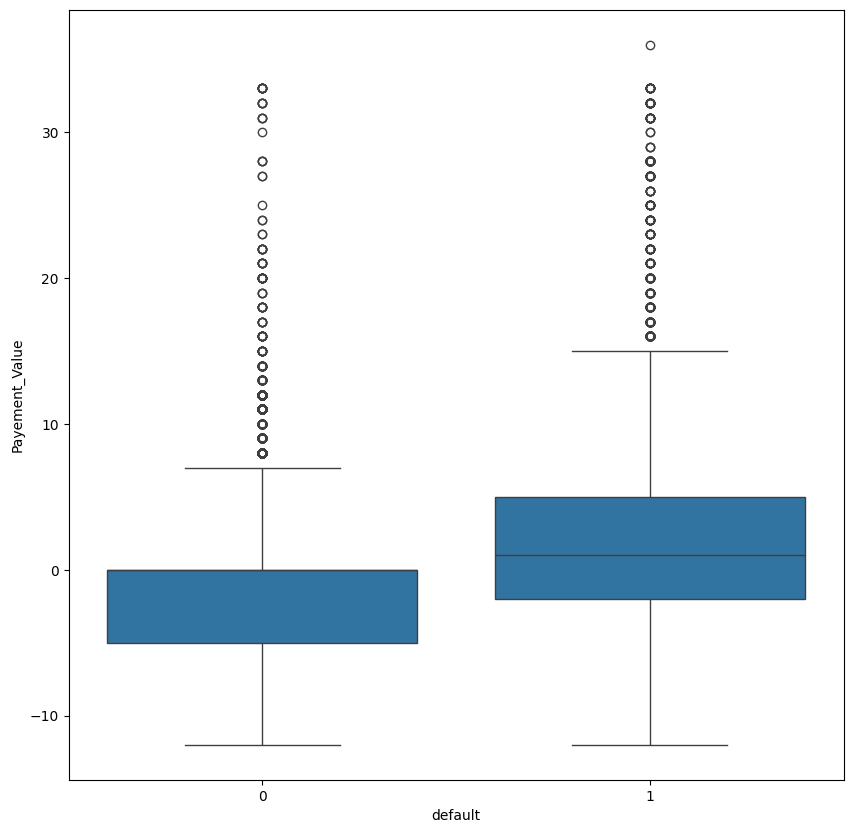

In [71]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df_fr, x = 'default', y = 'Payement_Value' )

In [72]:
df_fr['Dues'] = (df_fr['BILL_AMT_APRIL']+df_fr['BILL_AMT_MAY']+df_fr['BILL_AMT_JUNE']+df_fr['BILL_AMT_JULY']+df_fr['BILL_AMT_AUG']+df_fr['BILL_AMT_SEPT'])-(df_fr['PAY_AMT_APRIL']+df_fr['PAY_AMT_MAY']+df_fr['PAY_AMT_JUNE']+df_fr['PAY_AMT_JULY']+df_fr['PAY_AMT_AUG']+df_fr['PAY_AMT_SEPT'])

In [73]:
df_fr.groupby('default')['Dues'].mean()

default
0    237459.487203
1    241157.815450
Name: Dues, dtype: float64

In [74]:
df_fr['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [75]:
df_fr['EDUCATION']=np.where(df_fr['EDUCATION'] == 6, 4, df_fr['EDUCATION'])
df_fr['EDUCATION']=np.where(df_fr['EDUCATION'] == 5, 4, df_fr['EDUCATION'])
df_fr['EDUCATION']=np.where(df_fr['EDUCATION'] == 0, 4, df_fr['EDUCATION'])

In [76]:
df_fr['EDUCATION'].unique()

array([2, 1, 3, 4], dtype=int64)

In [77]:
df_fr['MARRIAGE']=np.where(df_fr['MARRIAGE'] == 0, 3, df_fr['MARRIAGE'])

In [78]:
df_fr['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

In [79]:
df_fr.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)
df_fr.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUNE,...,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,default,Payement_Value,Dues
0,1,20000.0,FEMALE,university,married,24,2,2,-1,-1,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,-2,7015.0
1,2,120000.0,FEMALE,university,single,26,-1,2,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,3,12077.0
2,3,90000.0,FEMALE,university,single,34,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,90635.0
3,4,50000.0,FEMALE,university,married,37,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,222946.0
4,5,50000.0,MALE,university,married,57,-1,0,-1,0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,-2,50290.0


### 4. One Hot Encoding

In [22]:
# Encoding categorical variables
df_fr = pd.get_dummies(df_fr,columns=['SEX', 'EDUCATION','MARRIAGE']).astype(int)

df_fr.head()
     

,ID,LIMIT_BAL,AGE,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUNE,PAY_MAY,PAY_APRIL,BILL_AMT_SEPT,...,Dues,SEX_FEMALE,SEX_MALE,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,7015,1,0,0,0,0,1,1,0,0
1,2,120000,26,-1,2,0,0,0,2,2682,...,12077,1,0,0,0,0,1,0,0,1
2,3,90000,34,0,0,0,0,0,0,29239,...,90635,1,0,0,0,0,1,0,0,1
3,4,50000,37,0,0,0,0,0,0,46990,...,222946,1,0,0,0,0,1,1,0,0
4,5,50000,57,-1,0,-1,0,0,0,8617,...,50290,0,1,0,0,0,1,1,0,0


In [23]:
df_fr = pd.get_dummies(df_fr, columns = ['PAY_SEPT',	'PAY_AUG',	'PAY_JULY',	'PAY_JUNE',	'PAY_MAY',	'PAY_APRIL'], drop_first = True ).astype(int)
df_fr.head()

,ID,LIMIT_BAL,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,...,PAY_APRIL_-1,PAY_APRIL_0,PAY_APRIL_1,PAY_APRIL_2,PAY_APRIL_3,PAY_APRIL_4,PAY_APRIL_5,PAY_APRIL_6,PAY_APRIL_7,PAY_APRIL_8
0,1,20000,24,3913,3102,689,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,26,2682,1725,2682,3272,3455,3261,0,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,34,29239,14027,13559,14331,14948,15549,1518,...,0,1,0,0,0,0,0,0,0,0
3,4,50000,37,46990,48233,49291,28314,28959,29547,2000,...,0,1,0,0,0,0,0,0,0,0
4,5,50000,57,8617,5670,35835,20940,19146,19131,2000,...,0,1,0,0,0,0,0,0,0,0


In [80]:
df_fr.drop('ID',axis = 1, inplace = True)
df_fr.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUNE,PAY_MAY,...,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,default,Payement_Value,Dues
0,20000.0,FEMALE,university,married,24,2,2,-1,-1,-2,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,-2,7015.0
1,120000.0,FEMALE,university,single,26,-1,2,0,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,3,12077.0
2,90000.0,FEMALE,university,single,34,0,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,90635.0
3,50000.0,FEMALE,university,married,37,0,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,222946.0
4,50000.0,MALE,university,married,57,-1,0,-1,0,0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,-2,50290.0


In [81]:
X = df_fr.drop(['default','Payement_Value','Dues'],axis=1)
y = df_fr['default']

In [82]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JULY', 'PAY_JUNE', 'PAY_MAY', 'PAY_APRIL',
       'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUNE',
       'BILL_AMT_MAY', 'BILL_AMT_APRIL', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY', 'PAY_AMT_APRIL'],
      dtype='object')

In [83]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()


#df_fr=df_fr.drop(columns=['default_payment_next_month'])
enco_columns=['SEX', 'EDUCATION', 'MARRIAGE','PAY_SEPT','PAY_AUG', 'PAY_JULY', 'PAY_JUNE', 'PAY_MAY', 'PAY_APRIL']
unenco_columns = [col for col in X.columns if col not in enco_columns]

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(sparse_output=False)




preprocessor=ColumnTransformer(
        [
            ("unenco_columns_pipeline",numeric_transformer,unenco_columns),
            ("enco_columns_pipeline",oh_transformer,enco_columns)

        ]
    )

### 5. Prepearing X & Y Variables

In [84]:
#X = df_fr.drop(['default','Payement_Value','Dues'],axis=1)
#y = df_fr['default']

#scaler = StandardScaler()
X = preprocessor.fit_transform(X)
X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape,X_test.shape, y_train.shape, y_test.shape

((31307, 89), (15421, 89), (31307,), (15421,))

### 6. Model training

In [85]:
models={
    "SVM":SVC(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "XGBoost":XGBClassifier(),
    "AdaBoost":AdaBoostClassifier(),
    "CatBoost":CatBoostClassifier()

}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Trainig set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1= f1_score(y_train,y_train_pred,average='weighted')
    model_train_Precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1= f1_score(y_test,y_test_pred,average='weighted')
    model_test_Precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)


    print(list(models.keys())[i])

    print('Model Performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- f1-score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_Precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- ROC AUC Score: {:.4f}".format(model_train_rocauc_score))
    


    print("-----------------------------------")

    print('Model Performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- f1-score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_Precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- ROC AUC Score: {:.4f}".format(model_test_rocauc_score))

    print('='*35)
    print('\n')
    


SVM
Model Performance for Training set
- Accuracy: 0.7912
- f1-score: 0.7902
- Precision: 0.8367
- Recall: 0.7231
- ROC AUC Score: 0.7911
-----------------------------------
Model Performance for Test set
- Accuracy: 0.7752
- f1-score: 0.7740
- Precision: 0.8243
- Recall: 0.7007
- ROC AUC Score: 0.7754


Decision Tree
Model Performance for Training set
- Accuracy: 0.9993
- f1-score: 0.9993
- Precision: 0.9999
- Recall: 0.9988
- ROC AUC Score: 0.9993
-----------------------------------
Model Performance for Test set
- Accuracy: 0.7413
- f1-score: 0.7412
- Precision: 0.7340
- Recall: 0.7584
- ROC AUC Score: 0.7413


Random Forest
Model Performance for Training set
- Accuracy: 0.9993
- f1-score: 0.9993
- Precision: 0.9992
- Recall: 0.9994
- ROC AUC Score: 0.9993
-----------------------------------
Model Performance for Test set
- Accuracy: 0.8288
- f1-score: 0.8287
- Precision: 0.8474
- Recall: 0.8028
- ROC AUC Score: 0.8289


XGBoost
Model Performance for Training set
- Accuracy: 0.8888


d:\DateScience\Credit_Card_Default_Prdiction\.sanenv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost
Model Performance for Training set
- Accuracy: 0.7650
- f1-score: 0.7646
- Precision: 0.7882
- Recall: 0.7243
- ROC AUC Score: 0.7650
-----------------------------------
Model Performance for Test set
- Accuracy: 0.7557
- f1-score: 0.7553
- Precision: 0.7809
- Recall: 0.7121
- ROC AUC Score: 0.7558


Learning rate set to 0.04483
0:	learn: 0.6770300	total: 156ms	remaining: 2m 35s
1:	learn: 0.6628362	total: 172ms	remaining: 1m 25s
2:	learn: 0.6504106	total: 188ms	remaining: 1m 2s
3:	learn: 0.6377603	total: 202ms	remaining: 50.3s
4:	learn: 0.6276730	total: 215ms	remaining: 42.8s
5:	learn: 0.6185972	total: 230ms	remaining: 38.1s
6:	learn: 0.6104303	total: 243ms	remaining: 34.5s
7:	learn: 0.6023069	total: 256ms	remaining: 31.7s
8:	learn: 0.5964316	total: 268ms	remaining: 29.5s
9:	learn: 0.5890268	total: 282ms	remaining: 27.9s
10:	learn: 0.5824985	total: 295ms	remaining: 26.5s
11:	learn: 0.5770326	total: 308ms	remaining: 25.3s
12:	learn: 0.5725623	total: 324ms	remaining: 24.6s
13:	l

In [86]:
model_names = []
model_train_accuracy = []
model_test_accuracy = []
model_test_precision = []
model_test_recall = []
model_test_f1 = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    model_names.append(name)
    model_train_accuracy.append(accuracy_score(y_train, model.predict(X_train))*100)
    model_test_accuracy.append(accuracy_score(y_test, y_pred)*100)
    model_test_precision.append(precision_score(y_test, y_pred)*100)
    model_test_recall.append(recall_score(y_test, y_pred)*100)
    model_test_f1.append(f1_score(y_test, y_pred)*100)

# Create a DataFrame summarizing the metrics
metrics_df = pd.DataFrame({
    'Classifier': model_names,
    'Train Accuracy': model_train_accuracy,
    'Test Accuracy': model_test_accuracy,
    'Precision Score': model_test_precision,
    'Recall Score': model_test_recall,
    'F1 Score': model_test_f1
})

# Display the DataFrame
print(metrics_df)


d:\DateScience\Credit_Card_Default_Prdiction\.sanenv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Learning rate set to 0.04483
0:	learn: 0.6770300	total: 9.07ms	remaining: 9.06s
1:	learn: 0.6628362	total: 48.7ms	remaining: 24.3s
2:	learn: 0.6504106	total: 68ms	remaining: 22.6s
3:	learn: 0.6377603	total: 84ms	remaining: 20.9s
4:	learn: 0.6276730	total: 99ms	remaining: 19.7s
5:	learn: 0.6185972	total: 113ms	remaining: 18.8s
6:	learn: 0.6104303	total: 127ms	remaining: 18s
7:	learn: 0.6023069	total: 142ms	remaining: 17.6s
8:	learn: 0.5964316	total: 160ms	remaining: 17.6s
9:	learn: 0.5890268	total: 175ms	remaining: 17.3s
10:	learn: 0.5824985	total: 190ms	remaining: 17.1s
11:	learn: 0.5770326	total: 206ms	remaining: 17s
12:	learn: 0.5725623	total: 225ms	remaining: 17.1s
13:	learn: 0.5677354	total: 244ms	remaining: 17.2s
14:	learn: 0.5634465	total: 263ms	remaining: 17.2s
15:	learn: 0.5583754	total: 280ms	remaining: 17.2s
16:	learn: 0.5551257	total: 299ms	remaining: 17.3s
17:	learn: 0.5509179	total: 317ms	remaining: 17.3s
18:	learn: 0.5467226	total: 332ms	remaining: 17.1s
19:	learn: 0.5439

#### Insights
- From the above results, RandomForest Classifier gives the best performance
- In RandomForest Classifier , we are getting around 99% Train accuracy and 83% for Test accuracy which depicts that model is overfitting.
- From the above results, RandomForest gives higher recall(80%) and higer f1-score(82%), whish is not bad

### 7. RandomForest Classifier

In [87]:
rf_cl=RandomForestClassifier()
rf_cl.fit(X_train, y_train)

y_pred=rf_cl.predict(X_test)
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cdf = pd.DataFrame(
    cm,
    index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)

print("\nConfusion Matrix:")
print(cdf)
print("================================================")
print ('classification_Report')
print (classification_report(y_test,y_pred))



Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0         6589         1107
Actual 1         1526         6199
classification_Report
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      7696
           1       0.85      0.80      0.82      7725

    accuracy                           0.83     15421
   macro avg       0.83      0.83      0.83     15421
weighted avg       0.83      0.83      0.83     15421



### 8. Hyperparameter Training


In [88]:
rf_params = {"max_depth":[5,8,15,None,10],
             "max_features":[5,7,"sqrt",8],
             "min_samples_split":[2,8,15,20],
             "n_estimators":[100,200,500,1000]}

rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'sqrt', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [89]:
# model List for Hyperparameter training
randomcv_models = [
                   ("RF", RandomForestClassifier(),rf_params),
                       
                    ]
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'sqrt', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [90]:
from sklearn.model_selection import RandomizedSearchCV

model_param ={}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"-----------------Best Params for {model_name}--------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
-----------------Best Params for RF--------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [91]:

rf_model=RandomForestClassifier(n_estimators=1000, min_samples_split =2 , max_features = 8, max_depth = None)
    



rf_model.fit(X_train, y_train)

# Make Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Trainig set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred)
model_train_f1= f1_score(y_train,y_train_pred,average='weighted')
model_train_Precision = precision_score(y_train, y_train_pred)
model_train_recall = recall_score(y_train, y_train_pred)
model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred)
model_test_f1= f1_score(y_test,y_test_pred,average='weighted')
model_test_Precision = precision_score(y_test, y_test_pred)
model_test_recall = recall_score(y_test, y_test_pred)
model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)


print(list(models.keys())[i])

print('Model Performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print("- f1-score: {:.4f}".format(model_train_f1))
print("- Precision: {:.4f}".format(model_train_Precision))
print("- Recall: {:.4f}".format(model_train_recall))
print("- ROC AUC Score: {:.4f}".format(model_train_rocauc_score))



print("-----------------------------------")

print('Model Performance for Test set')
print("- Accuracy: {:.4f}".format(model_test_accuracy))
print("- f1-score: {:.4f}".format(model_test_f1))
print("- Precision: {:.4f}".format(model_test_Precision))
print("- Recall: {:.4f}".format(model_test_recall))
print("- ROC AUC Score: {:.4f}".format(model_test_rocauc_score))

print('='*35)
print('\n')


CatBoost
Model Performance for Training set
- Accuracy: 0.9993
- f1-score: 0.9993
- Precision: 0.9992
- Recall: 0.9994
- ROC AUC Score: 0.9993
-----------------------------------
Model Performance for Test set
- Accuracy: 0.8322
- f1-score: 0.8322
- Precision: 0.8491
- Recall: 0.8088
- ROC AUC Score: 0.8323




### 9. Importance Features

In [95]:
# Define the models
rf_model = {
    "Random Forest": RandomForestClassifier(n_estimators=1000, min_samples_split=2, max_features=8, max_depth=None),
}

# Fit the model and retrieve feature importances
for name, model in rf_model.items():
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Retrieve feature importances
    feature_importances = model.feature_importances_
    
    # Print the number of features and their importance
    print(f"Model: {name}")
    print(f"Number of features: {len(feature_importances)}")
    print("Feature Importances:")
    for i, importance in enumerate(feature_importances):
        print(f"Feature {i+1}: {importance:.4f}")


    

Model: Random Forest
Number of features: 89
Feature Importances:
Feature 1: 0.0565
Feature 2: 0.0497
Feature 3: 0.0524
Feature 4: 0.0463
Feature 5: 0.0437
Feature 6: 0.0423
Feature 7: 0.0415
Feature 8: 0.0408
Feature 9: 0.0518
Feature 10: 0.0465
Feature 11: 0.0429
Feature 12: 0.0405
Feature 13: 0.0389
Feature 14: 0.0416
Feature 15: 0.0190
Feature 16: 0.0187
Feature 17: 0.0096
Feature 18: 0.0109
Feature 19: 0.0016
Feature 20: 0.0079
Feature 21: 0.0204
Feature 22: 0.0010
Feature 23: 0.0176
Feature 24: 0.0062
Feature 25: 0.0077
Feature 26: 0.0166
Feature 27: 0.0154
Feature 28: 0.0281
Feature 29: 0.0011
Feature 30: 0.0002
Feature 31: 0.0001
Feature 32: 0.0000
Feature 33: 0.0000
Feature 34: 0.0000
Feature 35: 0.0033
Feature 36: 0.0058
Feature 37: 0.0082
Feature 38: 0.0237
Feature 39: 0.0147
Feature 40: 0.0009
Feature 41: 0.0003
Feature 42: 0.0001
Feature 43: 0.0000
Feature 44: 0.0000
Feature 45: 0.0000
Feature 46: 0.0032
Feature 47: 0.0051
Feature 48: 0.0056
Feature 49: 0.0165
Feature 50: 0

In [97]:
X1 = X
X1

array([[-1.06503186, -1.30183057, -0.63241774, ...,  0.        ,
         0.        ,  0.        ],
       [-0.27003906, -1.07522706, -0.64931135, ...,  0.        ,
         0.        ,  0.        ],
       [-0.5085369 , -0.16881302, -0.28485691, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.82653402, -0.50871828, -0.68076556, ...,  0.        ,
         0.        ,  0.        ],
       [-0.37405526,  0.73760102, -0.16039736, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.35343718, -0.50871828, -0.54929315, ...,  0.        ,
         0.        ,  0.        ]])

In [98]:
# Fit the Random Forest model (replace X_train, y_train with your data)
rf_model = RandomForestClassifier(n_estimators=1000, min_samples_split=2, max_features=8, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Retrieve feature importances and feature names
feature_importances = rf_model.feature_importances_
feature_names = X1.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)[:10]

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(
    data=importance_df,
    x='Importance',
    y='Feature',
    palette="viridis"
)
plt.title("Feature Importances (Descending Order)", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [37]:
df_imp = X1[feature_names[:20]]
df_imp['default'] = df_fr['default']
df_imp.head()

C:\Users\sanss\AppData\Local\Temp\ipykernel_16744\1627338506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp['default'] = df_fr['default']


,LIMIT_BAL,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,...,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,SEX_FEMALE,SEX_MALE,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,default
0,20000,24,3913,3102,689,0,0,0,0,689,...,0,0,0,1,0,0,0,0,1,1
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,1000,0,2000,1,0,0,0,0,1,1
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,1000,1000,5000,1,0,0,0,0,1,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,1100,1069,1000,1,0,0,0,0,1,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,9000,689,679,0,1,0,0,0,1,0


In [38]:
X_imp = df_imp.drop('default',axis=1)
y_imp = df_imp['default']

X_imp = scaler.fit_transform(X_imp)
X_imp_train, X_imp_test, y_imp_train, y_imp_test = train_test_split(X_imp, y_imp, test_size=0.2, random_state=42)

In [39]:
models={
    "Random Forest":RandomForestClassifier(n_estimators=500, min_samples_split = 2, max_features = 8, max_depth = None),
    

}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_imp_train, y_imp_train)
    
    # Make Predictions
    y_imp_train_pred = model.predict(X_imp_train)
    y_imp_test_pred = model.predict(X_imp_test)
    
    # Trainig set performance
    model_train_accuracy = accuracy_score(y_imp_train, y_imp_train_pred)
    model_train_f1= f1_score(y_imp_train,y_imp_train_pred,average='weighted')
    model_train_Precision = precision_score(y_imp_train, y_imp_train_pred)
    model_train_recall = recall_score(y_imp_train, y_imp_train_pred)
    model_train_rocauc_score = roc_auc_score(y_imp_train, y_imp_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_imp_test, y_imp_test_pred)
    model_test_f1= f1_score(y_imp_test,y_imp_test_pred,average='weighted')
    model_test_Precision = precision_score(y_imp_test, y_imp_test_pred)
    model_test_recall = recall_score(y_imp_test, y_imp_test_pred)
    model_test_rocauc_score = roc_auc_score(y_imp_test, y_imp_test_pred)


    print(list(models.keys())[i])

    print('Model Performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- f1-score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_Precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- ROC AUC Score: {:.4f}".format(model_train_rocauc_score))
    


    print("-----------------------------------")

    print('Model Performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- f1-score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_Precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- ROC AUC Score: {:.4f}".format(model_test_rocauc_score))

    print('='*35)
    print('\n')

Random Forest
Model Performance for Training set
- Accuracy: 0.9986
- f1-score: 0.9986
- Precision: 0.9981
- Recall: 0.9991
- ROC AUC Score: 0.9986
-----------------------------------
Model Performance for Test set
- Accuracy: 0.8108
- f1-score: 0.8108
- Precision: 0.8109
- Recall: 0.8116
- ROC AUC Score: 0.8108




### 10. ROC AUC Score

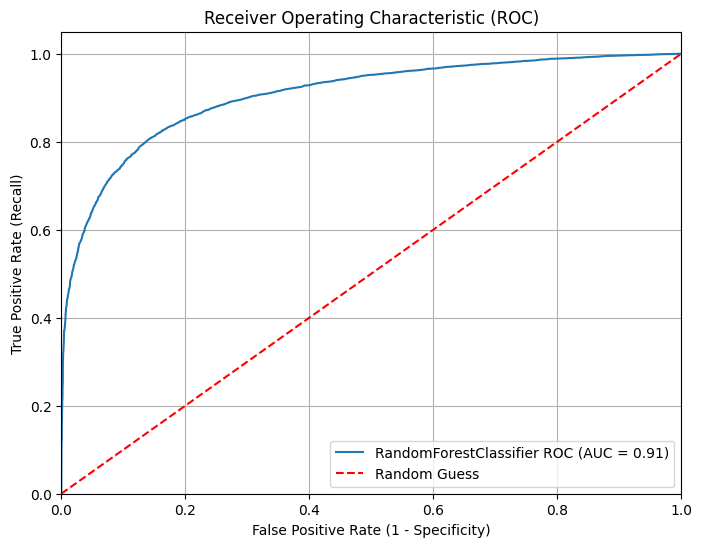

In [99]:
from sklearn.metrics import roc_curve, roc_auc_score


# Define models with AUC
auc_models = [
    {
        'label': 'RandomForestClassifier',
        'model': RandomForestClassifier(n_estimators=1000, min_samples_split=2, max_features=8, max_depth=None),
    }
]

# Initialize plot
plt.figure(figsize=(8, 6))

for algo in auc_models:
    model = algo['model']
    label = algo['label']

    # Train model
    model.fit(X_train, y_train)

    # Get predicted probabilities for class 1
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate ROC and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{label} ROC (AUC = {auc:.2f})')

# Add diagonal line (random guess)
plt.plot([0, 1], [0, 1], 'r--', label="Random Guess")

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()

# Save and show plot
plt.savefig('auc.png')
plt.show()
